In [8]:
# jupyter_analysis.ipynb - Cell 1
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# プロットのスタイル設定（お好みで）
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 6)

In [16]:
# jupyter_analysis.ipynb - Cell 2

# 解析対象のファイルパス (指定された絶対パス)
file_path = '/home/daiki/lab/data/20251120/LDhkelec_reconst_dBScan-001-0.60dB_reconst_lightonly.csv'

# ファイルの存在確認
if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
else:
    # CSVの読み込み
    df = pd.read_csv(file_path)
    
    # データの基本情報を表示
    print(f"Loaded data from: {os.path.basename(file_path)}")
    print(f"Total Events: {len(df)}")
    
    # データの中身を少し確認
    display(df.head())

Loaded data from: LDhkelec_reconst_dBScan-001-0.60dB_reconst_lightonly.csv
Total Events: 77347


,fit_x,fit_y,fit_z,t_light,err_x,err_y,err_z,t_error,chi2,ndf,A,B
0,-0.202726,-0.917702,137.524,0,0.681066,0.685592,2.74366,0,2.805420,2,15208600.0,2011100.0
1,-0.431660,-0.127272,134.664,0,0.659482,0.656705,2.76190,0,0.702369,2,14643900.0,1995770.0
2,-0.080130,-1.562700,140.197,0,0.702557,0.704792,2.60121,0,2.240630,2,15810600.0,2156980.0
3,-1.807010,-1.069950,139.748,0,0.731065,0.731093,2.18547,0,0.131656,2,13899400.0,2472620.0
4,-1.382240,-2.584960,116.455,0,1.240000,2.294690,24.92150,0,3.223820,2,5194350.0,2791550.0


In [17]:
# jupyter_analysis.ipynb - Cell 3

# 保存先ディレクトリの設定 (データファイルの場所にある reconst_images)
target_dir = os.path.dirname(file_path)
base_name = os.path.splitext(os.path.basename(file_path))[0]
output_dir = os.path.join(target_dir, "reconst_images")

# ディレクトリ作成
os.makedirs(output_dir, exist_ok=True)
print(f"Output directory: {output_dir}")

Output directory: /home/daiki/lab/data/20251120/reconst_images


Saved: /home/daiki/lab/data/20251120/reconst_images/LDhkelec_reconst_dBScan-001-0.60dB_reconst_lightonly_xy.pdf


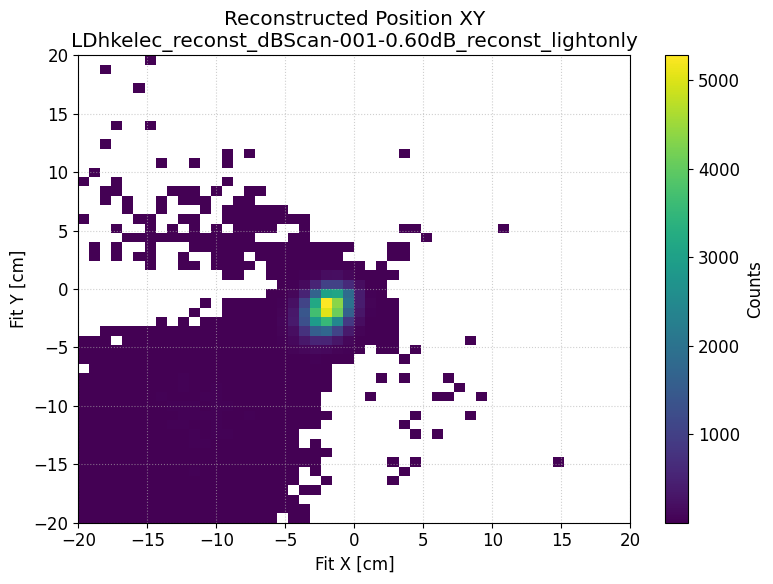

In [18]:
# jupyter_analysis.ipynb - Cell 4

# --- 設定パラメータ ---
xy_range = [[-20, 20], [-20, 20]] # 表示範囲 [cm]
xy_bins = 50                      # ビンの数

# --- 描画 ---
plt.figure()
h = plt.hist2d(df['fit_x'], df['fit_y'], bins=xy_bins, 
               range=xy_range, cmap='viridis', cmin=1)

plt.title(f'Reconstructed Position XY\n{base_name}')
plt.xlabel('Fit X [cm]')
plt.ylabel('Fit Y [cm]')
plt.colorbar(h[3], label='Counts')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()

# 保存と表示
save_path = os.path.join(output_dir, f"{base_name}_xy.pdf")
plt.savefig(save_path)
print(f"Saved: {save_path}")
plt.show()

Saved: /home/daiki/lab/data/20251120/reconst_images/LDhkelec_reconst_dBScan-001-0.60dB_reconst_lightonly_z.pdf


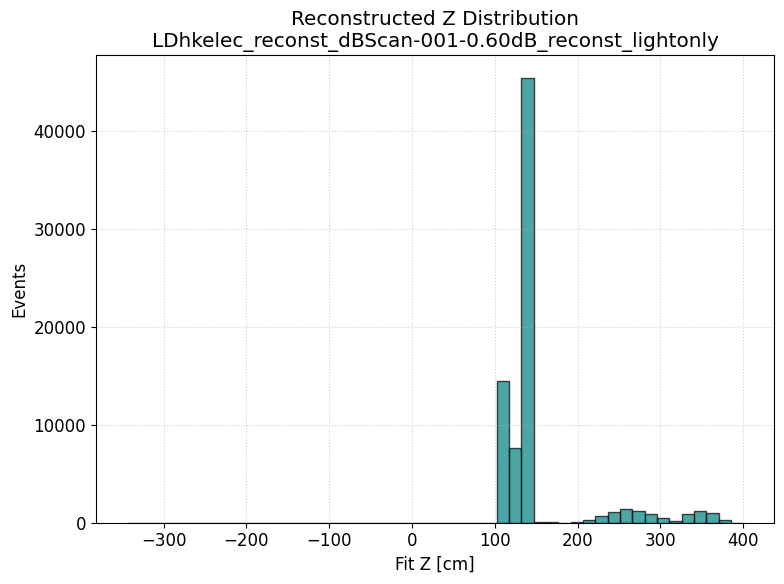

In [19]:
# jupyter_analysis.ipynb - Cell 5

# --- 設定パラメータ ---
z_bins = 50
# z_range = [-200, 500] # 必要であれば範囲を指定してください

# --- 描画 ---
plt.figure()
plt.hist(df['fit_z'], bins=z_bins, color='teal', alpha=0.7, edgecolor='black')

plt.title(f'Reconstructed Z Distribution\n{base_name}')
plt.xlabel('Fit Z [cm]')
plt.ylabel('Events')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()

# 保存と表示
save_path = os.path.join(output_dir, f"{base_name}_z.pdf")
plt.savefig(save_path)
print(f"Saved: {save_path}")
plt.show()

Saved: /home/daiki/lab/data/20251120/reconst_images/LDhkelec_reconst_dBScan-001-0.60dB_reconst_lightonly_chi2.pdf


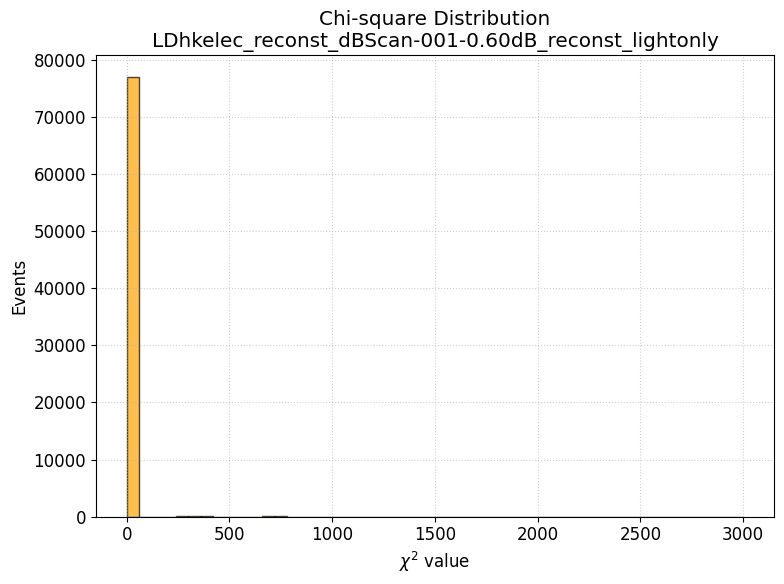

In [20]:
# jupyter_analysis.ipynb - Cell 6

# --- 設定パラメータ ---
chi2_range = (0, 3000) # 値が大きいようなので広めに設定 (データに合わせて調整してください)
chi2_bins = 50

# --- 描画 ---
plt.figure()
plt.hist(df['chi2'], bins=chi2_bins, range=chi2_range, color='orange', alpha=0.7, edgecolor='black')

plt.title(f'Chi-square Distribution\n{base_name}')
plt.xlabel(r'$\chi^2$ value')
plt.ylabel('Events')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()

# 保存と表示
save_path = os.path.join(output_dir, f"{base_name}_chi2.pdf")
plt.savefig(save_path)
print(f"Saved: {save_path}")
plt.show()

/tmp/ipykernel_23097/1290862326.py:14: RuntimeWarning: divide by zero encountered in divide
  return a * np.exp(-(x - mu)**2 / (2 * sigma**2))
/tmp/ipykernel_23097/1290862326.py:37: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=p0, maxfev=5000)
/tmp/ipykernel_23097/1290862326.py:14: RuntimeWarning: invalid value encountered in divide
  return a * np.exp(-(x - mu)**2 / (2 * sigma**2))


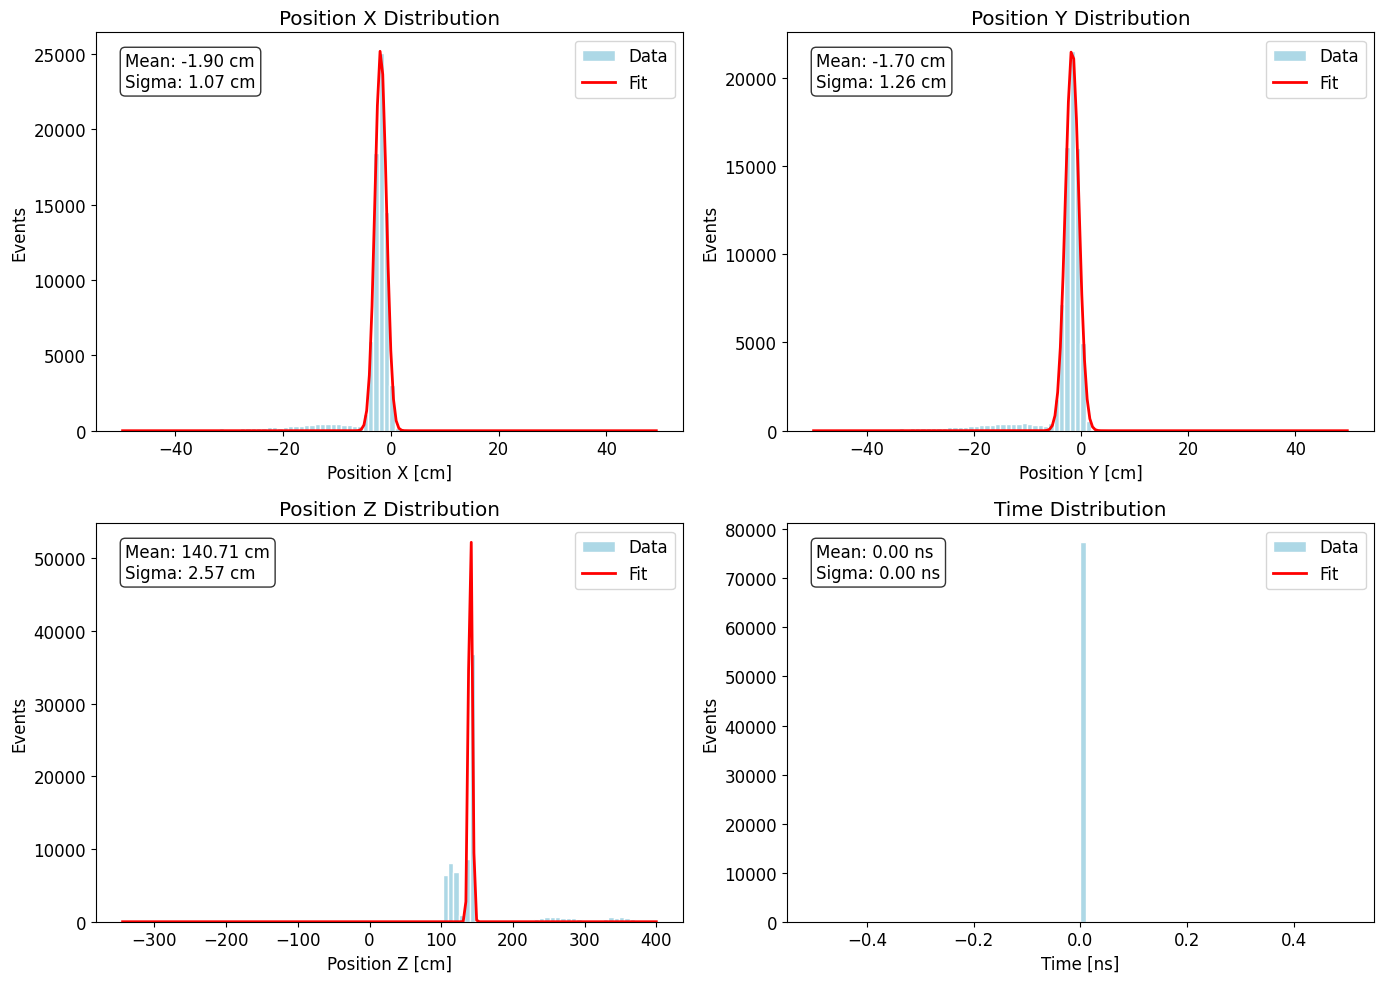

=== Gaussian Fit Results ===
[Position X]
  Mean  : -1.8973 +/- 0.0076 cm
  Sigma : 1.0685 +/- 0.0076 cm

[Position Y]
  Mean  : -1.6984 +/- 0.0118 cm
  Sigma : 1.2590 +/- 0.0118 cm

[Position Z]
  Mean  : 140.7051 +/- 5.4749 cm
  Sigma : 2.5712 +/- 5.4722 cm

[Time]
  Mean  : 0.0000 +/- inf ns
  Sigma : 0.0000 +/- inf ns


Results saved to: /home/daiki/lab/data/20251120/gauss_fit_results.txt


In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import os

# 1. データの読み込み
file_path = '/home/daiki/lab/data/20251120/LDhkelec_reconst_dBScan-001-0.60dB_reconst_lightonly.csv'
df = pd.read_csv(file_path)

# --- ガウス関数の定義 ---
def gaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- フィッティングと描画を行う関数 ---
def fit_hist(data, ax, label, unit, bins=100, plot_range=None):
    # データを範囲でフィルタリング (Noneの場合は全データ)
    if plot_range:
        data_cut = data[(data >= plot_range[0]) & (data <= plot_range[1])]
    else:
        data_cut = data
        
    # ヒストグラムデータの作成
    counts, bin_edges = np.histogram(data_cut, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # 初期値の推定 (高さ, 平均, 標準偏差)
    p0 = [max(counts), np.mean(data_cut), np.std(data_cut)]
    
    fit_success = False
    popt = [0, 0, 0]
    perr = [0, 0, 0]

    try:
        # フィッティング実行
        popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=p0, maxfev=5000)
        perr = np.sqrt(np.diag(pcov)) # 誤差
        fit_success = True
    except:
        print(f"Fit failed for {label}")

    # --- 描画 ---
    # 生データをヒストグラム表示
    ax.hist(data_cut, bins=bins, color='lightblue', edgecolor='white', label='Data')
    
    # フィット結果を曲線表示
    if fit_success:
        x_smooth = np.linspace(min(data_cut), max(data_cut), 200)
        ax.plot(x_smooth, gaussian(x_smooth, *popt), 'r-', lw=2, label='Fit')
        
        # 図の中に数値を書き込む
        fit_info = (f"Mean: {popt[1]:.2f} {unit}\n"
                    f"Sigma: {abs(popt[2]):.2f} {unit}")
        ax.text(0.05, 0.95, fit_info, transform=ax.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax.set_title(f"{label} Distribution")
    ax.set_xlabel(f"{label} [{unit}]")
    ax.set_ylabel("Events")
    ax.legend(loc='upper right')
    
    return popt, perr, fit_success

# ==========================================
# メイン処理: 4つの変数 (X, Y, Z, T) をフィット
# ==========================================

# 2行2列のキャンバスを用意
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes_flat = axes.flatten() # ループしやすいように1列に並べる

# 解析したいカラムと設定のリスト
# (カラム名, ラベル, 単位, 表示範囲(Noneなら自動))
targets = [
    ('fit_x',   'Position X', 'cm', [-50, 50]), # 必要に応じて範囲を変更してください
    ('fit_y',   'Position Y', 'cm', [-50, 50]),
    ('fit_z',   'Position Z', 'cm', None),      # Zは分布が広いかもしれないので自動
    ('t_light', 'Time',       'ns', None)       # 時間
]

results_text = "=== Gaussian Fit Results ===\n"

for i, (col, label, unit, rng) in enumerate(targets):
    ax = axes_flat[i]
    
    # データが存在するかチェック
    if col in df.columns:
        popt, perr, success = fit_hist(df[col], ax, label, unit, bins=100, plot_range=rng)
        
        # 結果をテキストに追加
        results_text += f"[{label}]\n"
        if success:
            results_text += f"  Mean  : {popt[1]:.4f} +/- {perr[1]:.4f} {unit}\n"
            results_text += f"  Sigma : {abs(popt[2]):.4f} +/- {perr[2]:.4f} {unit}\n"
        else:
            results_text += "  Fit Failed\n"
        results_text += "\n"
    else:
        ax.text(0.5, 0.5, f"Column '{col}' not found", ha='center')

plt.tight_layout()
plt.show()

# --- 結果の出力と保存 ---
print(results_text)

# 同じディレクトリに保存
save_path = os.path.join(os.path.dirname(file_path), "gauss_fit_results.txt")
with open(save_path, "w") as f:
    f.write(results_text)
print(f"Results saved to: {save_path}")